In [1]:
import requests
import getpass
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

import kaggle

In [2]:
pd.set_option('display.max_rows', 200)

In [3]:
pd.set_option('display.max_columns', 30)

In [4]:
pd.set_option('display.max_colwidth', -1)

Completing the missing data.

First try getting the scraped url: 

In [5]:
'''url = 'https://www.kaggle.com/soubenz/forbes-top-billionaires-list-2018/download'

r = requests.get(url,allow_redirects=True)

open('../data/raw/forbes-top-billionaires-list-2018.zip','wb').write(r.content)'''

"url = 'https://www.kaggle.com/soubenz/forbes-top-billionaires-list-2018/download'\n\nr = requests.get(url,allow_redirects=True)\n\nopen('../data/raw/forbes-top-billionaires-list-2018.zip','wb').write(r.content)"

We get one file (zip) but it doesn't work.

We analize the redirect:

In [6]:
'''response = requests.get('https://www.kaggle.com/soubenz/forbes-top-billionaires-list-2018/download')
if response.history:
    print("Request was redirected")
    for resp in response.history:
        print(resp.status_code, resp.url)
    print("Final destination:")
    print(response.status_code, response.url)
else:
    print("Request was not redirected")'''

'response = requests.get(\'https://www.kaggle.com/soubenz/forbes-top-billionaires-list-2018/download\')\nif response.history:\n    print("Request was redirected")\n    for resp in response.history:\n        print(resp.status_code, resp.url)\n    print("Final destination:")\n    print(response.status_code, response.url)\nelse:\n    print("Request was not redirected")'

We see that we do not arrive to the final url (to the zip file) because of the logging, but we can get the final url analizing with Google inspector:

In [7]:
'''url = 'https://storage.googleapis.com/kaggle-data-sets/33081/43334/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1578686000&Signature=dBHXfqzmtMm7hJKw7zKyjQiQ%2FFStHHvU7nP2s8FRtBeReKQNirYahgcgFVXgvFtMp4HCL4A7T4Oa4s%2Fyc7uiZoY%2FxCWL3u%2Bs0PIk8Rsyp2mrOFdytarGXKERxsLnqv0GbMX2NCYnL9PuAdAjzW3HStHzPV%2BTmMlMA9JvCazayGhinLTgtUZAljR4faP0nnfowSwyek16FTR%2Fo0IXIdddRXKyJifqKfsdNDNs3uWxQK2BsERSc%2BxCI0P5na1i70fOVG7rgJzhPj%2F10fqynkWXFrDtgKiNpXxc2ul%2B8rOIXp%2BsLKCUQmjKus0KXd9pkh%2FhWr26qO2JRKXIvxUb892xpg%3D%3D&response-content-disposition=attachment%3B+filename%3Dforbes-top-billionaires-list-2018.zip'

r = requests.get(url)

open('../data/raw/forbes-top-billionaires-list-2018.zip','wb').write(r.content)'''

"url = 'https://storage.googleapis.com/kaggle-data-sets/33081/43334/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1578686000&Signature=dBHXfqzmtMm7hJKw7zKyjQiQ%2FFStHHvU7nP2s8FRtBeReKQNirYahgcgFVXgvFtMp4HCL4A7T4Oa4s%2Fyc7uiZoY%2FxCWL3u%2Bs0PIk8Rsyp2mrOFdytarGXKERxsLnqv0GbMX2NCYnL9PuAdAjzW3HStHzPV%2BTmMlMA9JvCazayGhinLTgtUZAljR4faP0nnfowSwyek16FTR%2Fo0IXIdddRXKyJifqKfsdNDNs3uWxQK2BsERSc%2BxCI0P5na1i70fOVG7rgJzhPj%2F10fqynkWXFrDtgKiNpXxc2ul%2B8rOIXp%2BsLKCUQmjKus0KXd9pkh%2FhWr26qO2JRKXIvxUb892xpg%3D%3D&response-content-disposition=attachment%3B+filename%3Dforbes-top-billionaires-list-2018.zip'\n\nr = requests.get(url)\n\nopen('../data/raw/forbes-top-billionaires-list-2018.zip','wb').write(r.content)"

In [8]:
'''url = 'https://www.kaggle.com/fernandol/countries-of-the-world/download'

r = requests.get(url,allow_redirects=True)

open('../data/raw/world-countries.zip','wb').write(r.content)'''

"url = 'https://www.kaggle.com/fernandol/countries-of-the-world/download'\n\nr = requests.get(url,allow_redirects=True)\n\nopen('../data/raw/world-countries.zip','wb').write(r.content)"

In [9]:
'''response = requests.get('https://www.kaggle.com/fernandol/countries-of-the-world/download')
if response.history:
    print("Request was redirected")
    for resp in response.history:
        print(resp.status_code, resp.url)
    print("Final destination:")
    print(response.status_code, response.url)
else:
    print("Request was not redirected")'''

'response = requests.get(\'https://www.kaggle.com/fernandol/countries-of-the-world/download\')\nif response.history:\n    print("Request was redirected")\n    for resp in response.history:\n        print(resp.status_code, resp.url)\n    print("Final destination:")\n    print(response.status_code, response.url)\nelse:\n    print("Request was not redirected")'

In [10]:
'''url = 'https://storage.googleapis.com/kaggle-data-sets/23752/30346/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1578685848&Signature=kDXfWe%2FI1cwxD0rd07uBwi0CxtE68CrUGle%2BvsrwFpO8IZFamINMgUe00xEmOyTvIoUfg9DYSwHw%2FcmSh9lYIEmbUY4P%2FRoMx5zKtXiaODmHHql%2Flpu22vN6e2txi8mP%2F2pdqvDfY9bABdWqAmTk8uCOCd2GFoZJzF8sX348aQzRvJtvFteZeQE0U3ndGYYeUlG%2Bbjpfl4aoQ0qd00NEbeAV%2BmkbBsacwjPEy9Za7o1QBy3BxT1qKlamy0P9MlZsjanT%2BWbyzAkMp6VOaTrPpkMI%2FgasgqKXI1BupS1Y67fs5PbOR%2FafYu6r%2FtMw4sB5KzE8uHjxd%2Fl4av1J6TWAHw%3D%3D&response-content-disposition=attachment%3B+filename%3Dcountries-of-the-world.zip'

r = requests.get(url,allow_redirects=True)

open('../data/raw/world-countries.zip','wb').write(r.content)'''

"url = 'https://storage.googleapis.com/kaggle-data-sets/23752/30346/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1578685848&Signature=kDXfWe%2FI1cwxD0rd07uBwi0CxtE68CrUGle%2BvsrwFpO8IZFamINMgUe00xEmOyTvIoUfg9DYSwHw%2FcmSh9lYIEmbUY4P%2FRoMx5zKtXiaODmHHql%2Flpu22vN6e2txi8mP%2F2pdqvDfY9bABdWqAmTk8uCOCd2GFoZJzF8sX348aQzRvJtvFteZeQE0U3ndGYYeUlG%2Bbjpfl4aoQ0qd00NEbeAV%2BmkbBsacwjPEy9Za7o1QBy3BxT1qKlamy0P9MlZsjanT%2BWbyzAkMp6VOaTrPpkMI%2FgasgqKXI1BupS1Y67fs5PbOR%2FafYu6r%2FtMw4sB5KzE8uHjxd%2Fl4av1J6TWAHw%3D%3D&response-content-disposition=attachment%3B+filename%3Dcountries-of-the-world.zip'\n\nr = requests.get(url,allow_redirects=True)\n\nopen('../data/raw/world-countries.zip','wb').write(r.content)"

API Kaggle datasets download (autentication requierd):

In [11]:
kaggle.api.authenticate()

In [21]:
kaggle.api.dataset_download_files('fernandol/countries-of-the-world', path='../data/raw/', unzip=True)

In [22]:
kaggle.api.dataset_download_files('soubenz/forbes-top-billionaires-list-2018', path='../data/raw/', unzip=True)

In [23]:
df_forbes_kag = pd.read_csv('../data/raw/forbes_2018.csv')
df_forbes_kag.head(5)

,position,name,lastName,age,country,gender,wealthSource,industry,worth,worthChange,realTimeWorth,realTimePosition,image
0,NaN,Anant Asavabhokhin & family,Asavabhokhin,67.0,Thailand,M,real estate,Real Estate,NaN,-0.001,NaN,1613,https://specials-images.forbesimg.com/imageserve/5ae0e71ca7ea43127982a6f6/416x416.jpg?background=000000&cropX1=909&cropX2=1588&cropY1=17&cropY2=696
1,NaN,Arash Ferdowsi,Ferdowsi,32.0,United States,M,online file storage,Technology,NaN,0.000,NaN,1734,https://specials-images.forbesimg.com/imageserve/5ae0e71ca7ea43127982a6f6/416x416.jpg?background=000000&cropX1=909&cropX2=1588&cropY1=17&cropY2=696
2,NaN,Banthoon Lamsam & family,Lamsam,65.0,Thailand,M,banking,Finance and Investments,NaN,0.001,NaN,1952,https://specials-images.forbesimg.com/imageserve/5ad8e8bea7ea432fbc1f6f2f/416x416.jpg?background=000000&cropX1=1091&cropX2=2771&cropY1=434&cropY2=2113
3,NaN,Bill Adderley & family,Adderley,70.0,United Kingdom,M,home furnishings,Fashion & Retail,NaN,0.000,NaN,1956,https://specials-images.forbesimg.com/imageserve/5ad8e8bea7ea432fbc1f6f2f/416x416.jpg?background=000000&cropX1=1091&cropX2=2771&cropY1=434&cropY2=2113
4,NaN,Boris Zingarevich,Zingarevich,58.0,Russia,M,"pulp and paper, diversified",Diversified,NaN,0.000,NaN,2103,https://specials-images.forbesimg.com/imageserve/5ad8b4844bbe6f2310f30482/416x416.jpg?background=000000&cropX1=1177&cropX2=4510&cropY1=247&cropY2=3577


Drop all columns but 'country', 'name', 'lastName','wealthSource'

In [24]:
df_forbes_kag.drop(['position','industry','worth','worthChange','realTimeWorth','realTimePosition','image','wealthSource','lastName'], axis=1, inplace=True)
df_forbes_kag

,name,age,country,gender
0,Anant Asavabhokhin & family,67.0,Thailand,M
1,Arash Ferdowsi,32.0,United States,M
2,Banthoon Lamsam & family,65.0,Thailand,M
3,Bill Adderley & family,70.0,United Kingdom,M
4,Boris Zingarevich,58.0,Russia,M
...,...,...,...,...
2255,Zhao Xiaoqiang,51.0,China,M
2256,Zhou Liangzhang,55.0,China,M
2257,Zhu Xingming,51.0,China,M
2258,Zhuo Jun,52.0,Hong Kong,F


import the cleaned csv (and drop column 'unnamed0' with index_col=0)

In [25]:
forbes_df = pd.read_csv('../data/processed/forbes_df.csv',index_col=0)
forbes_df

,id,position,name,age_years,gender,country,sector,corp.,worth_busd,image
0,6448,1,Jeff Bezos,54,Male,United States,Technology,Amazon,112.0,https://specials-images.forbesimg.com/imageserve/5a8d920d31358e4955adf197/416x416.jpg?background=000000&cropX1=755&cropX2=2357&cropY1=494&cropY2=2097
1,3509,2,Bill Gates,62,Male,United States,Technology,Microsoft,90.0,https://specials-images.forbesimg.com/imageserve/5a942b7b31358e79a28a452b/416x416.jpg?background=000000&cropX1=285&cropX2=3498&cropY1=146&cropY2=3360
2,3062,3,Warren Buffett,87,Male,United States,Finance And Investments,Berkshire Hathaway,84.0,https://specials-images.forbesimg.com/imageserve/5a8d9b3a31358e4955adf300/416x416.jpg?background=000000&cropX1=378&cropX2=2650&cropY1=52&cropY2=2322
3,5964,4,Bernard Arnault,69,Male,None,Fashion & Retail,Lvmh,72.0,https://specials-images.forbesimg.com/imageserve/5a7de808a7ea431690131adf/416x416.jpg?background=000000&cropX1=125&cropX2=2852&cropY1=11&cropY2=2736
4,1044,5,Mark Zuckerberg,33,Male,None,Technology,Facebook,71.0,https://specials-images.forbesimg.com/imageserve/59d5062131358e542c034eb7/416x416.jpg?background=000000&cropX1=419&cropX2=1409&cropY1=53&cropY2=1044
...,...,...,...,...,...,...,...,...,...,...
2203,5027,2204,Zhao Xiaoqiang,51,None,None,Fashion & Retail,"Fashion, Entertainment",1.0,https://specials-images.forbesimg.com/imageserve/064a602f59f8656c7e2a1765a579be37/416x416.jpg?background=000000&cropX1=0&cropX2=744&cropY1=219&cropY2=963
2204,1258,2205,Zhou Liangzhang,55,Male,None,Manufacturing,Electrical Equipment,1.0,https://specials-images.forbesimg.com/imageserve/064a602f59f8656c7e2a1765a579be37/416x416.jpg?background=000000&cropX1=0&cropX2=744&cropY1=219&cropY2=963
2205,7890,2206,Zhu Xingming,51,None,None,Manufacturing,Electrical Equipment,1.0,https://specials-images.forbesimg.com/imageserve/064a602f59f8656c7e2a1765a579be37/416x416.jpg?background=000000&cropX1=0&cropX2=744&cropY1=219&cropY2=963
2206,9083,2207,Zhuo Jun,52,None,None,Manufacturing,Printed Circuit Boards,1.0,https://specials-images.forbesimg.com/imageserve/064a602f59f8656c7e2a1765a579be37/416x416.jpg?background=000000&cropX1=0&cropX2=744&cropY1=219&cropY2=963


In [26]:
forbes_df.drop(['id','image','country','age_years','gender'], axis=1, inplace=True)
forbes_df

,position,name,sector,corp.,worth_busd
0,1,Jeff Bezos,Technology,Amazon,112.0
1,2,Bill Gates,Technology,Microsoft,90.0
2,3,Warren Buffett,Finance And Investments,Berkshire Hathaway,84.0
3,4,Bernard Arnault,Fashion & Retail,Lvmh,72.0
4,5,Mark Zuckerberg,Technology,Facebook,71.0
...,...,...,...,...,...
2203,2204,Zhao Xiaoqiang,Fashion & Retail,"Fashion, Entertainment",1.0
2204,2205,Zhou Liangzhang,Manufacturing,Electrical Equipment,1.0
2205,2206,Zhu Xingming,Manufacturing,Electrical Equipment,1.0
2206,2207,Zhuo Jun,Manufacturing,Printed Circuit Boards,1.0


In [27]:
forbes_df = pd.merge(forbes_df,df_forbes_kag, on='name',sort=True)
forbes_df[45:60]

,position,name,sector,corp.,worth_busd,age,country,gender
45,1310,Alexander Nesis,Finance And Investments,"Metals, Banking, Fertilizers",1.9,55.0,Russia,M
46,128,Alexander Otto,Real Estate,Real Estate,11.8,50.0,Germany,M
47,693,Alexander Ponomarenko,Logistics,"Real Estate, Airport",3.4,53.0,Russia,M
48,1824,Alexander Rovt,Manufacturing,"Fertilizer, Real Estate",1.3,65.0,United States,M
49,2090,Alexander Samwer,Technology,Tech Investments,1.1,43.0,Germany,M
50,698,Alexander Skorobogatko,Logistics,"Real Estate, Airport",3.4,50.0,Russia,M
51,1062,Alexander Spanos,Sports,"Real Estate, Los Angeles Chargers",2.4,94.0,United States,M
52,727,Alexander Svetakov,Finance And Investments,Real Estate,3.3,50.0,Russia,M
53,1840,Alexander Tedja,Real Estate,Real Estate,1.3,72.0,Indonesia,M
54,2195,Alexander Vik,Finance And Investments,Investments,1.0,63.0,Norway,M


Identify one space after some strings in 'Country' column of df_countries

In [29]:
df_countries = pd.read_csv('../data/raw/countries of the world.csv', delimiter=",", decimal=",")
df_countries
#df_countries['Country'].iloc[190]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


...but not in df_forbes

In [30]:
forbes_df.rename(columns={'country':'Country'}, inplace=True)
forbes_df['Country'].iloc[57]

'Germany'

In [31]:
cols_forbes = forbes_df.columns.tolist()
cols_forbes

['position',
 'name',
 'sector',
 'corp.',
 'worth_busd',
 'age',
 'Country',
 'gender']

In [32]:
cols = ['position', 'name', 'gender', 'sector', 'corp.', 'worth_busd', 'age','Country']

forbes_df = forbes_df[cols]
forbes_df[52:58]

,position,name,gender,sector,corp.,worth_busd,age,Country
52,727,Alexander Svetakov,M,Finance And Investments,Real Estate,3.3,50.0,Russia
53,1840,Alexander Tedja,M,Real Estate,Real Estate,1.3,72.0,Indonesia
54,2195,Alexander Vik,M,Finance And Investments,Investments,1.0,63.0,Norway
55,1655,Alexandra Andresen,F,Diversified,Investments,1.4,21.0,Norway
56,1229,Alexandra Daitch,F,Food And Beverage,Cargill,2.0,55.0,United States
57,453,Alexandra Schoerghuber,F,Real Estate,Real Estate,4.7,59.0,Germany


In [33]:
df_countries['Country'] = df_countries['Country'].map(lambda x: x.strip())

In [34]:
df_countries['Country'].iloc[190]

'Spain'

In [35]:
forbes_df['Country'] = forbes_df['Country'].map(lambda x: x.strip())

In [36]:
forbes_df['Country'].iloc[57]

'Germany'

In [58]:
df_countries['Region'] = df_countries['Region'].map(lambda x: x.strip())

In [59]:
df_forbes_country = pd.merge(forbes_df,df_countries, on='Country',sort=True)

In [60]:
df_forbes_country.sort_values(['position'], axis=0, ascending=True, inplace=True) 
df_forbes_country[:10]

,position,name,gender,sector,corp.,worth_busd,age,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
1757,1,Jeff Bezos,M,Technology,Amazon,112.0,54.0,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,0.22,80.65,3.0,14.14,8.26,0.010,0.204,0.787
1562,2,Bill Gates,M,Technology,Microsoft,90.0,62.0,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,0.22,80.65,3.0,14.14,8.26,0.010,0.204,0.787
2059,3,Warren Buffett,M,Finance And Investments,Berkshire Hathaway,84.0,87.0,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,0.22,80.65,3.0,14.14,8.26,0.010,0.204,0.787
572,4,Bernard Arnault,M,Fashion & Retail,Lvmh,72.0,69.0,France,WESTERN EUROPE,60876136,547030,111.3,0.63,0.66,4.26,27600.0,99.0,586.4,33.53,2.07,64.40,4.0,11.99,9.14,0.022,0.214,0.764
1873,5,Mark Zuckerberg,M,Technology,Facebook,71.0,34.0,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,0.22,80.65,3.0,14.14,8.26,0.010,0.204,0.787
1274,6,Amancio Ortega,M,Fashion & Retail,Zara,70.0,82.0,Spain,WESTERN EUROPE,40397842,504782,80.0,0.98,0.99,4.42,22000.0,97.9,453.5,26.07,9.87,64.06,3.0,10.06,9.72,0.040,0.295,0.665
1072,7,Carlos Slim Helu,M,Telecom,Telecom,67.1,78.0,Mexico,LATIN AMER. & CARIB,107449525,1972550,54.5,0.47,-4.87,20.91,9000.0,92.2,181.6,12.99,1.31,85.70,1.5,20.69,4.74,0.038,0.259,0.702
1590,8,Charles Koch,M,Diversified,Koch Industries,60.0,82.0,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,0.22,80.65,3.0,14.14,8.26,0.010,0.204,0.787
1629,9,David Koch,M,Diversified,Koch Industries,60.0,78.0,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,0.22,80.65,3.0,14.14,8.26,0.010,0.204,0.787
1836,10,Larry Ellison,M,Technology,Software,58.5,73.0,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,0.22,80.65,3.0,14.14,8.26,0.010,0.204,0.787


In [61]:
null_cols_df_forbes_country = df_forbes_country.isnull().sum()
null_cols_df_forbes_country

position                              0  
name                                  0  
gender                                10 
sector                                0  
corp.                                 0  
worth_busd                            0  
age                                   55 
Country                               0  
Region                                0  
Population                            0  
Area (sq. mi.)                        0  
Pop. Density (per sq. mi.)            0  
Coastline (coast/area ratio)          0  
Net migration                         0  
Infant mortality (per 1000 births)    0  
GDP ($ per capita)                    0  
Literacy (%)                          2  
Phones (per 1000)                     7  
Arable (%)                            1  
Crops (%)                             1  
Other (%)                             1  
Climate                               206
Birthrate                             0  
Deathrate                         

In [62]:
df_forbes_country['gender'].replace(to_replace='M', value='Male',inplace=True)
df_forbes_country['gender'].replace(to_replace='F', value='Female',inplace=True)


df_forbes_country.head()


,position,name,gender,sector,corp.,worth_busd,age,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
1757,1,Jeff Bezos,Male,Technology,Amazon,112.0,54.0,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,0.22,80.65,3.0,14.14,8.26,0.010,0.204,0.787
1562,2,Bill Gates,Male,Technology,Microsoft,90.0,62.0,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,0.22,80.65,3.0,14.14,8.26,0.010,0.204,0.787
2059,3,Warren Buffett,Male,Finance And Investments,Berkshire Hathaway,84.0,87.0,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,0.22,80.65,3.0,14.14,8.26,0.010,0.204,0.787
572,4,Bernard Arnault,Male,Fashion & Retail,Lvmh,72.0,69.0,France,WESTERN EUROPE,60876136,547030,111.3,0.63,0.66,4.26,27600.0,99.0,586.4,33.53,2.07,64.40,4.0,11.99,9.14,0.022,0.214,0.764
1873,5,Mark Zuckerberg,Male,Technology,Facebook,71.0,34.0,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,0.22,80.65,3.0,14.14,8.26,0.010,0.204,0.787


In [63]:
df_forbes_country.drop(['Coastline (coast/area ratio)','Infant mortality (per 1000 births)','Literacy (%)','Climate','Birthrate','Deathrate','Arable (%)','Crops (%)','Other (%)','Agriculture','Industry','Service'],axis=1,inplace=True)
df_forbes_country

,position,name,gender,sector,corp.,worth_busd,age,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Net migration,GDP ($ per capita),Phones (per 1000)
1757,1,Jeff Bezos,Male,Technology,Amazon,112.0,54.0,United States,NORTHERN AMERICA,298444215,9631420,31.0,3.41,37800.0,898.0
1562,2,Bill Gates,Male,Technology,Microsoft,90.0,62.0,United States,NORTHERN AMERICA,298444215,9631420,31.0,3.41,37800.0,898.0
2059,3,Warren Buffett,Male,Finance And Investments,Berkshire Hathaway,84.0,87.0,United States,NORTHERN AMERICA,298444215,9631420,31.0,3.41,37800.0,898.0
572,4,Bernard Arnault,Male,Fashion & Retail,Lvmh,72.0,69.0,France,WESTERN EUROPE,60876136,547030,111.3,0.66,27600.0,586.4
1873,5,Mark Zuckerberg,Male,Technology,Facebook,71.0,34.0,United States,NORTHERN AMERICA,298444215,9631420,31.0,3.41,37800.0,898.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,2204,Zhao Xiaoqiang,Male,Fashion & Retail,"Fashion, Entertainment",1.0,51.0,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,-0.40,5000.0,266.7
515,2205,Zhou Liangzhang,Male,Manufacturing,Electrical Equipment,1.0,55.0,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,-0.40,5000.0,266.7
526,2206,Zhu Xingming,Male,Manufacturing,Electrical Equipment,1.0,51.0,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,-0.40,5000.0,266.7
790,2207,Zhuo Jun,Female,Manufacturing,Printed Circuit Boards,1.0,52.0,Hong Kong,ASIA (EX. NEAR EAST),6940432,1092,6355.7,5.24,28800.0,546.7


In [64]:
df_forbes_country.rename(columns={'Area (sq. mi.)':'area sq. mi.','Pop. Density (per sq. mi.)':'pop. density per sq. mi.','GDP ($ per capita)':'GDP $ per capita','Phones (per 1000)':'phones per 1000'}, inplace=True)
df_forbes_country

,position,name,gender,sector,corp.,worth_busd,age,Country,Region,Population,area sq. mi.,pop. density per sq. mi.,Net migration,GDP $ per capita,phones per 1000
1757,1,Jeff Bezos,Male,Technology,Amazon,112.0,54.0,United States,NORTHERN AMERICA,298444215,9631420,31.0,3.41,37800.0,898.0
1562,2,Bill Gates,Male,Technology,Microsoft,90.0,62.0,United States,NORTHERN AMERICA,298444215,9631420,31.0,3.41,37800.0,898.0
2059,3,Warren Buffett,Male,Finance And Investments,Berkshire Hathaway,84.0,87.0,United States,NORTHERN AMERICA,298444215,9631420,31.0,3.41,37800.0,898.0
572,4,Bernard Arnault,Male,Fashion & Retail,Lvmh,72.0,69.0,France,WESTERN EUROPE,60876136,547030,111.3,0.66,27600.0,586.4
1873,5,Mark Zuckerberg,Male,Technology,Facebook,71.0,34.0,United States,NORTHERN AMERICA,298444215,9631420,31.0,3.41,37800.0,898.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,2204,Zhao Xiaoqiang,Male,Fashion & Retail,"Fashion, Entertainment",1.0,51.0,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,-0.40,5000.0,266.7
515,2205,Zhou Liangzhang,Male,Manufacturing,Electrical Equipment,1.0,55.0,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,-0.40,5000.0,266.7
526,2206,Zhu Xingming,Male,Manufacturing,Electrical Equipment,1.0,51.0,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,-0.40,5000.0,266.7
790,2207,Zhuo Jun,Female,Manufacturing,Printed Circuit Boards,1.0,52.0,Hong Kong,ASIA (EX. NEAR EAST),6940432,1092,6355.7,5.24,28800.0,546.7


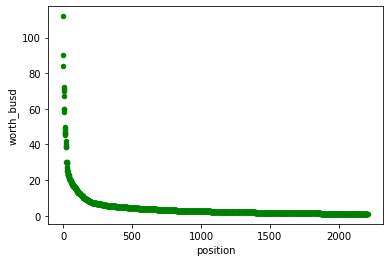

<Figure size 432x288 with 0 Axes>

In [65]:
df_forbes_country.plot(kind='scatter',x='position',y='worth_busd',color='green')

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('../data/processed/images/position_worthbusd.png', dpi=100)

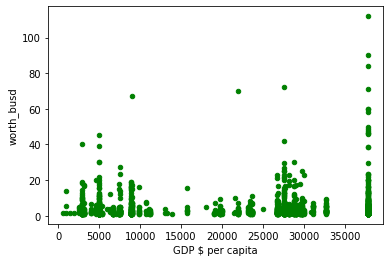

In [66]:
df_forbes_country.plot(kind='scatter',x='GDP $ per capita',y='worth_busd',color='green')
plt.show()

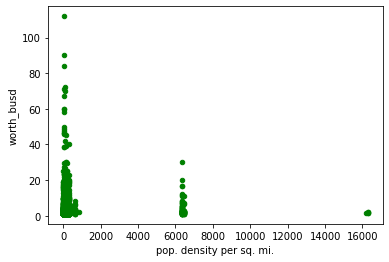

In [67]:
df_forbes_country.plot(kind='scatter',x='pop. density per sq. mi.',y='worth_busd',color='green')
plt.show()

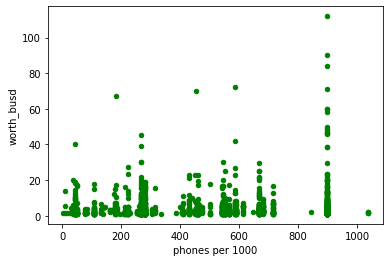

In [68]:
df_forbes_country.plot(kind='scatter',x='phones per 1000',y='worth_busd',color='green')
plt.show()

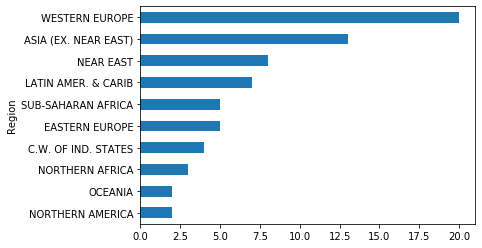

In [87]:
a = df_forbes_country.groupby('Region')['Country'].nunique()#.plot(kind='barh',color='red')
a.sort_values(inplace=True,ascending=True)
a.plot(kind='barh')
plt.show()

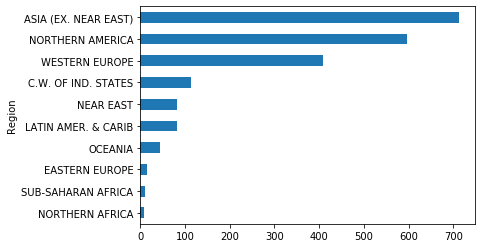

In [88]:
b = df_forbes_country.groupby('Region')['name'].nunique()#.plot(kind='barh',color='red')
b.sort_values(inplace=True,ascending=True)
b.plot(kind='barh')
plt.show()

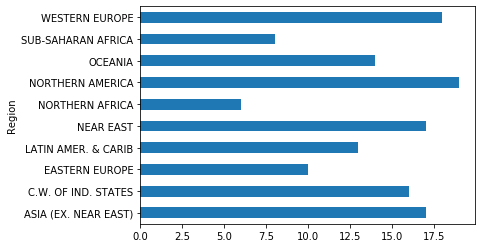

In [70]:
df_forbes_country.groupby('Region')['sector'].nunique().plot(kind='barh')
plt.show()

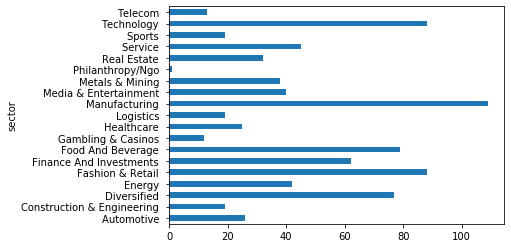

In [71]:
df_forbes_country.groupby('sector')['corp.'].nunique().plot(kind='barh')
plt.show()

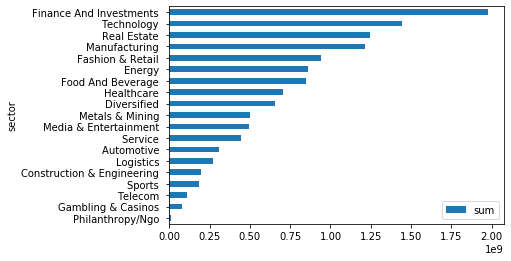

In [102]:
x = df_forbes_country.groupby('sector')['area sq. mi.'].agg([np.sum])#.plot(kind='bar')
x.sort_values(by=['sum'],inplace=True, ascending=True)
x.plot.barh()
plt.show()

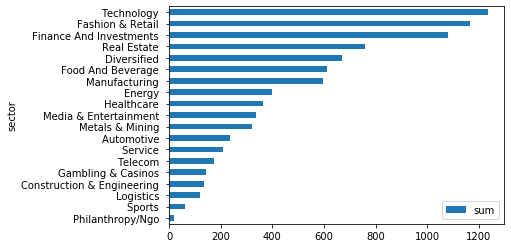

In [136]:
x = df_forbes_country.groupby('sector')['worth_busd'].agg([np.sum])#.plot(kind='bar')
x.sort_values(by=['sum'],inplace=True, ascending=True)
x.plot.barh()
plt.show()

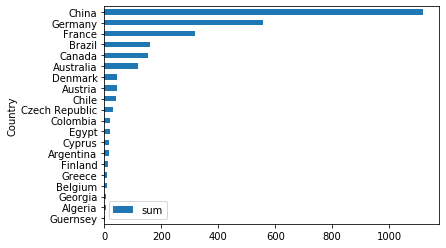

In [135]:
x = df_forbes_country.groupby('Country')['worth_busd'].agg([np.sum]).head(20)#.plot(kind='bar')
x.sort_values(by=['sum'],inplace=True, ascending=True)
x.plot.barh()
plt.show()

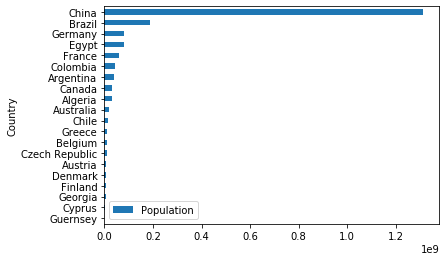

In [132]:
z = df_forbes_country.groupby('Country').agg({'Population':max}).head(20)#.plot(kind='bar')
z.sort_values(by=['Population'],inplace=True, ascending=True)
z.plot.barh()

plt.show()

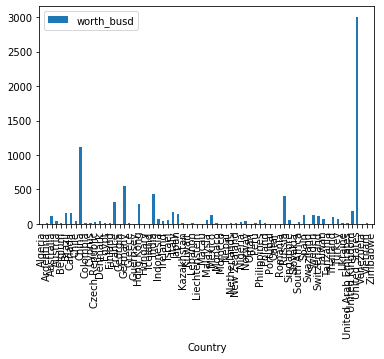

In [74]:
df_forbes_country.groupby('Country').agg({'worth_busd':sum}).plot(kind='bar')
plt.show()

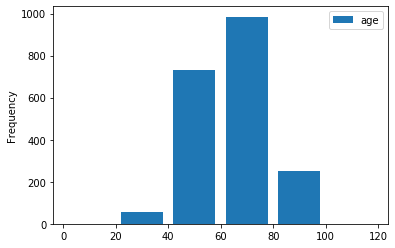

In [75]:
df_forbes_country[['age']].plot(kind='hist',bins=[0,20,40,60,80,100,120],rwidth=0.8)
plt.show()

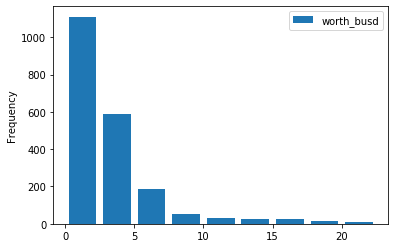

In [76]:
df_forbes_country[['worth_busd']].plot(kind='hist',bins=[0,2.5,5,7.5,10,12.5,15,17.5,20,22.5],rwidth=0.8)
plt.show()

In [55]:
import sys
sys.path.append('../package1')

In [56]:
import module1

In [57]:
module1.strip_df_column(df_countries['Country'])

0      Afghanistan   
1      Albania       
2      Algeria       
3      American Samoa
4      Andorra       
        ...          
222    West Bank     
223    Western Sahara
224    Yemen         
225    Zambia        
226    Zimbabwe      
Name: Country, Length: 227, dtype: object